<a href="https://colab.research.google.com/github/mburu-mwangi/titanic-dataset/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2021_10_Alfonce_Mwangi_Python_KNN_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

Predicting the survival of passengers who boarded the titanic ship 

### a) Specifying the Data Analytic Question

* Who survived the sinking of the ship?
* What is the relation of the survival status and the class of the victim and sex of the victim?
* What feature has most weight in predicting the target variable?

### b) Defining the Metric for Success
> It shall be achieved by:


* Using Knn model to predict the survival status of the passengers who boarded the titanic ship with very small error rates.

### c) Understanding the context 
 > The titanic was a large ship with hundreds of passesngers onboard and it sank in the early morning hours of 15th April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City.
 > Many people did not survive due to the the lack of enough lifeboats among other factors.


### d) Recording the Experimental Design

* Data cleaning.
*  Getting the univariate and bivariate analysis.
* Using the Knn model to predict the survival of the passengers on board.

### e) Data Relevance

> The dataset is relevant to the task given.

## 2. Reading the Data

### Importing the necessary libraries


In [98]:
# aiding in analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# aiding in engineering and modeling
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

### Reading the train dataset.

In [99]:
# Loading the Data from the source
# 
df_1 = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
df_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Reading the test dataset.

In [100]:
# Loading the Data from the source
# 
df_2 = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')
df_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




## 3. Checking the Data

### train dataset


In [101]:
# Determining the no. of records and features in the dataset
#
print('This dataset contains',df_1.shape[0], 'rows and',df_1.shape[1],'columns' )

This dataset contains 891 rows and 12 columns


In [102]:
# Previewing the top of our dataset
#
df_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
# Previewing the bottom of our dataset
# 
df_1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [104]:
# Checking whether each column has an appropriate datatype
#
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### test dataset

In [105]:
# Determining the no. of records and features in the dataset
#
print('This dataset contains',df_2.shape[0], 'rows and',df_2.shape[1],'columns' )

This dataset contains 418 rows and 11 columns


In [106]:
# Previewing the top of our dataset
#
df_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
# Previewing the bottom of our dataset
# 
df_2.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [108]:
# Checking whether each column has an appropriate datatype
#
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 4. External Data Source Validation

## 5. Tidying the Dataset

### train dataset

In [109]:
df_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
# dropping the unnecessary columns
#
df_1.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [111]:
df_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [112]:
# Checking for Outliers
#
print(df_1['SibSp'].unique())
print('\n')
print(df_1['Parch'].unique())
print('\n')
print(df_1['Sex'].unique())
print('\n')
print(df_1['Embarked'].unique())
print('\n')
print(df_1['Survived'].unique())
print('\n')
print(df_1['Pclass'].unique())

[1 0 3 4 2 5 8]


[0 1 2 5 3 4 6]


['male' 'female']


['S' 'C' 'Q' nan]


[0 1]


[3 1 2]


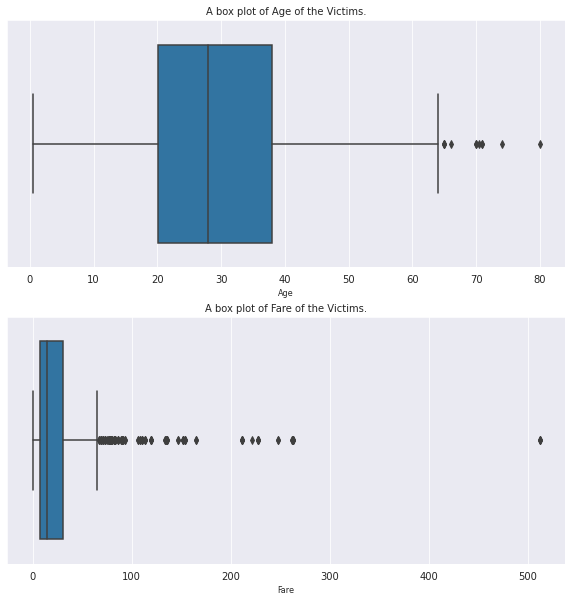

In [113]:
# Checking for Anomalies
#
cols = ['Age','Fare']
fig,ax=plt.subplots(len(cols),figsize=(10,10))
# 
for i, col_vals in enumerate(cols):
  sns.boxplot(df_1[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+col_vals+ ' of the Victims.',fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()

I will not remove the outliers as shown in the boxplots above. Since the data will lack important details.

In [114]:
# Identifying the Missing Data
#
df_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [115]:
print(df_1.groupby(['Pclass','Sex'])['Age'].median())

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64


In [116]:
# Dealing with the Missing Data
#
# Filling with the median age based on the sex and the class of the victim
#
df_1['Age'] = df_1.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [117]:
# As for the Embarked column
#
df_1['Embarked'].fillna('S', inplace=True)



In [118]:
df_1['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [119]:
df_1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [120]:
# Checking for duplicates
#
df_1.duplicated().sum()

0

### test dataset

In [121]:
df_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
# dropping the unnecessary columns
#
df_2.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [123]:
df_1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [124]:
# Checking for Outliers
#
print(df_2['SibSp'].unique())
print('\n')
print(df_2['Parch'].unique())
print('\n')
print(df_2['Sex'].unique())
print('\n')
print(df_2['Embarked'].unique())
print('\n')
print(df_2['Pclass'].unique())

[0 1 2 3 4 5 8]


[0 1 3 2 4 6 5 9]


['male' 'female']


['Q' 'S' 'C']


[3 2 1]


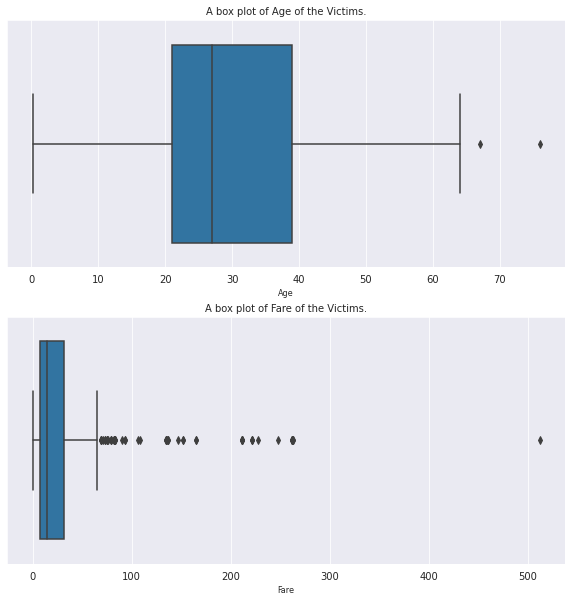

In [125]:
# Checking for Anomalies
#
cols = ['Age','Fare']
fig,ax=plt.subplots(len(cols),figsize=(10,10))
 
for i, col_vals in enumerate(cols):
  sns.boxplot(df_2[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+col_vals+ ' of the Victims.',fontsize=10)
  ax[i].set_xlabel(col_vals,fontsize=8)
plt.show()

I will not remove the outliers as shown in the boxplots above. Since the data will lack important details.

In [126]:
# Identifying the Missing Data
#
df_2.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [127]:
# Dealing with the Missing Data

# Filling with the median age based on the sex and the class of the victim
#
df_2['Age'] = df_2.groupby(['Pclass','Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

In [128]:
# As for the Fare column
#
df_2.loc[df_2['Fare'].isnull()]



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [129]:
# Replacing the null value with the median of entries with the same inputs
#
Fare_rep_null = df_2.loc[(df_2['Pclass']==3) & (df_2['SibSp']==0)  & (df_2['Embarked']=='S')]['Fare'].median()
print(Fare_rep_null)
df_2.loc[df_2['Fare'].isnull(),"Fare"] = Fare_rep_null

7.8958


In [130]:
df_2.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
dtype: bool

In [131]:
# Checking for duplicates
#
df_2.duplicated().sum()

0

In [132]:
df_2['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

## 6. Exploratory Analysis

I will be using the train dataset for analysis

### Univariate Analysis

In [133]:
df_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [134]:
# Visualising the Victims who survived and those who did not
#
def univariate(df,var_1):
  sns.set_style('darkgrid')
  bar, ax = plt.subplots(figsize=(10,10))
  ax=sns.countplot(x=f"{var_1}",data=df)
  ax.set_title(f"{var_1} victims")
  ax.set_xlabel(f"{var_1}",fontsize=16)
  ax.set_ylabel("Count",fontsize=16)
  plt.show()
  
  return



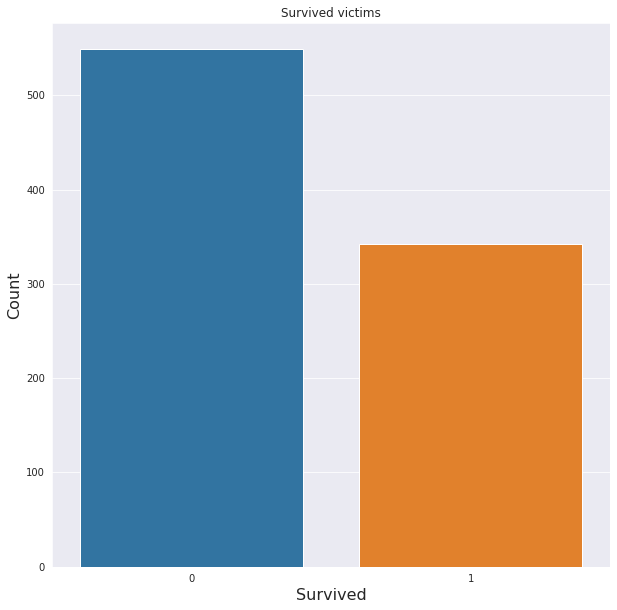

In [135]:
# Visualising the Victims who survived and those who did not
#
univariate(df_1,'Survived')

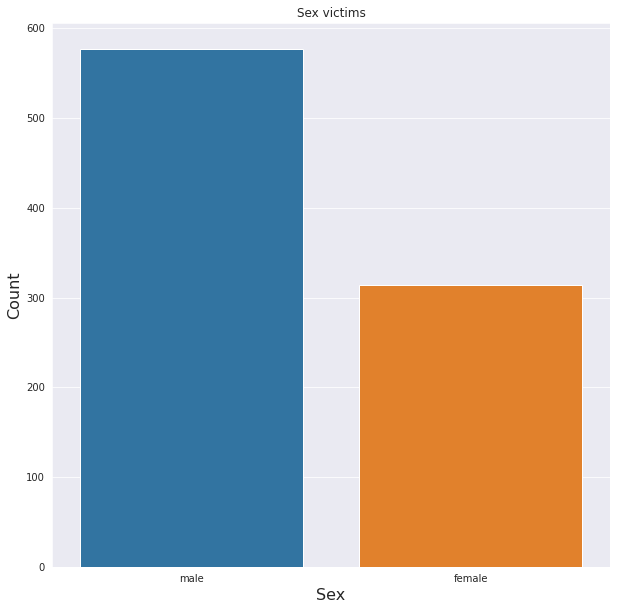

In [136]:
# Visualising the general count of the sex of the victims
#
univariate(df_1,'Sex')

From the univariate analysis, I can deduce that:
* More people died from the dataset given
* Most people who boarded the boat were male

### Bivariate Analysis

In [137]:
# 
#
def bivariate(df,var_1,var_2):
  sns.set_style('darkgrid')
  bar, ax = plt.subplots(figsize=(10,10))
  ax=sns.countplot(x=f"{var_1}",hue = f"{var_2}",data=df)
  ax.set_title(f"{var_1} victims")
  ax.set_xlabel(f"{var_1}",fontsize=16)
  ax.set_ylabel("Count",fontsize=16)
  plt.show()
  return 

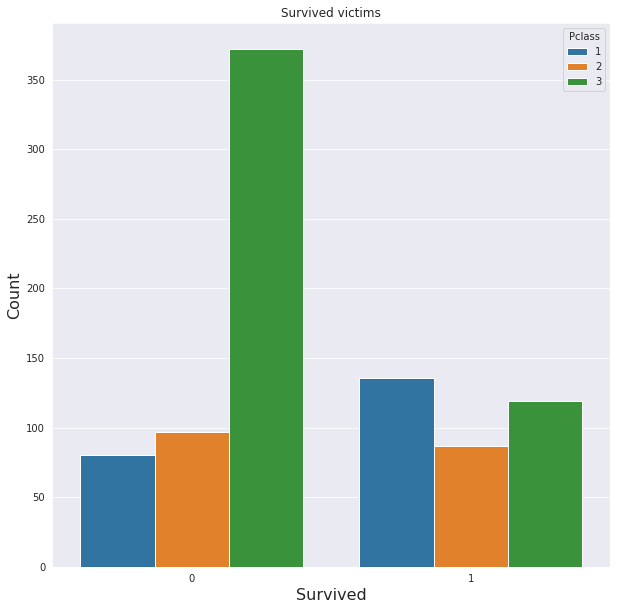

In [138]:
# Visualising the comparison of 
bivariate(df_1,'Survived','Pclass',)

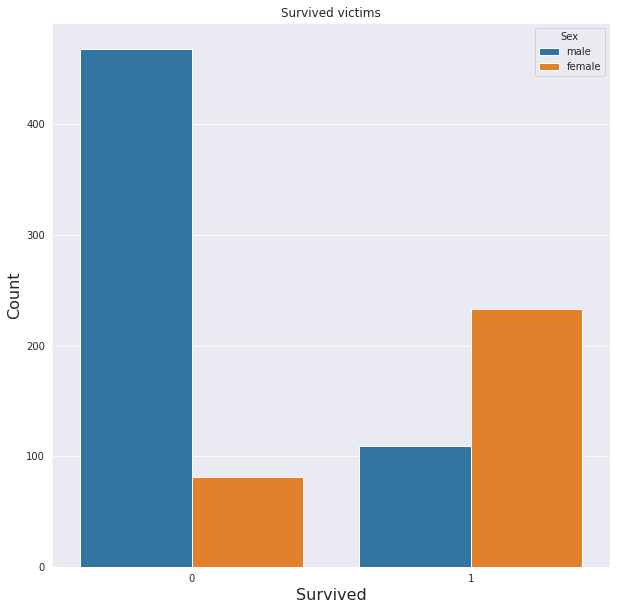

In [139]:
# visualising the survived victims based on sex
#
bivariate(df_1,'Survived','Sex')

From the bivariate analysis, i can deduce that:
* Most People from third class cabins died
* Most Males generally died and most females survived.

### Feature Engineering

#### *train set*


In [140]:
# getting the categorical data that needs to be engineered
#
categorical_data_train = [col for col in df_1  if df_1[col].dtypes == 'O']
print(categorical_data_train)

['Sex', 'Embarked']


In [141]:
df_1['Embarked'].nunique()

3

In [142]:
embarked_1 = pd.get_dummies(df_1['Embarked'],drop_first=True)
sex_1 = pd.get_dummies(df_1['Sex'],drop_first=True)


In [143]:
df_1.drop(['Sex', 'Embarked'],axis=1,inplace=True)

In [144]:
df_1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,21.5,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [145]:
train_df = pd.concat([df_1,embarked_1,sex_1], axis=1)

In [146]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1


#### *test set*


In [147]:
# getting the categorical data that needs to be engineered
#
categorical_data_test= [col for col in df_2  if df_2[col].dtypes == 'O']
print(categorical_data_test)

['Sex', 'Embarked']


In [148]:
df_2['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [149]:
embarked_2 = pd.get_dummies(df_2['Embarked'],drop_first=True)
sex_2 = pd.get_dummies(df_2['Sex'],drop_first=True)


In [150]:
df_2.drop(['Sex', 'Embarked'],axis=1,inplace=True)

In [151]:
df_2

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,24.0,0,0,8.0500


In [152]:
test_df = pd.concat([df_2,embarked_2,sex_2], axis=1)

In [153]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,892,3,34.5,0,0,7.8292,1,0,1
1,893,3,47.0,1,0,7.0000,0,1,0
2,894,2,62.0,0,0,9.6875,1,0,1
3,895,3,27.0,0,0,8.6625,0,1,1
4,896,3,22.0,1,1,12.2875,0,1,0


## 7. Implementing the Solution

In [154]:
# Checking for multicollinearity
#
X = train_df.drop(['Survived'],axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

      features  vif_Factor
0  PassengerId    3.731956
1       Pclass    7.033150
2          Age    4.799154
3        SibSp    1.583157
4        Parch    1.629023
5         Fare    1.741166
6            Q    1.605779
7            S    4.945686
8         male    3.186561


The variables are not highly correlated

In [155]:
train_df.shape

(891, 10)

In [156]:
# Getting our target feature and response features
#
y = train_df['Survived'].values
X = train_df.drop(['Survived'],axis=1).values

X_test_test = test_df.values

In [157]:
# Splitting the data into testing and training sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [158]:
# Standardizing the features
# 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test_test = sc.transform(X_test_test)

In [159]:
# Getting error rate values in a range of k-values 0-40
# 
error_rate = []

for i in range(1,40):
    
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    pred_i = classifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

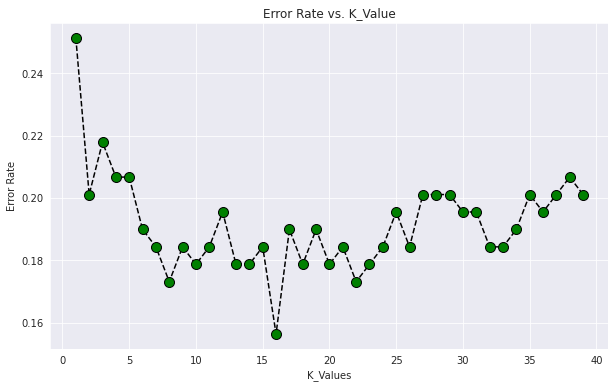

In [160]:
# plotting the values from the error rate list above
#
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K_Value')
plt.xlabel('K_Values')
plt.ylabel('Error Rate')

The best K-value should be 13

In [161]:
# Instantiating the Knn classifier and fitting the model 
#
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [162]:
# predicting the test set(from the test_df) and getting the necessary accuracy scores and report
#
y_pred = classifier.predict(X_train)

print('Accuracy Score: ',accuracy_score(y_train,y_pred))
print('*****************************************************************************')
print(confusion_matrix(y_train, y_pred))
print('*****************************************************************************')
print(classification_report(y_train, y_pred))

Accuracy Score:  0.8441011235955056
*****************************************************************************
[[391  41]
 [ 70 210]]
*****************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       432
           1       0.84      0.75      0.79       280

    accuracy                           0.84       712
   macro avg       0.84      0.83      0.83       712
weighted avg       0.84      0.84      0.84       712



In [163]:
Test_pred = classifier.predict(X_test)
Test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0])

## 8. Challenging the solution

### when test_size=0.3 

In [164]:
#  splitting the data into test and train sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [165]:
classifier.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')>

In [166]:
params={"metric":['minkowski','eucledian','cosine_similarity'],
        "n_neighbors": np.arange(1,15),
        "p":np.arange(1,3),
        "weights":['uniform','distance']}

classifier = KNeighborsClassifier()
# Tuning the model to obtain the best parameters
classifier_search=GridSearchCV(estimator=classifier,param_grid=params,cv=5,verbose=1)
# Fitting my training set 
classifier_search.fit(X_train,y_train)
print(classifier_search.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'minkowski', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    1.8s finished


In [167]:
# Obtaining the best estimator to make our prediction
best_model=classifier_search.best_estimator_
# Making our prediction using the tuned model
Y_pred=best_model.predict(X_test)
# Computing the accuracy score,confusion matrix and classification report
print('Accuracy Score: ',accuracy_score(y_train,Y_pred))
print('*****************************************************************************')
print(confusion_matrix(y_train, Y_pred))
print('*****************************************************************************')
print(classification_report(y_train, Y_pred))

ValueError: ignored

## 9. Follow up questions

### a). Did we have the right data?
> Yes

### b). Do we need other data to answer our question?

### c). Did we have the right question?